In [2]:
import json
import matplotlib.pyplot as plt

In [1]:
def plot_accuracy(base_path, files, ds):
    
    plt.figure(figsize=(8, 4))

    label = ["ViT Baseline Train Acc", "ViT DeCAtt Train Acc", "ViT Baseline Val Acc", "ViT DeCAtt Val Acc"]
    color = ["r", "b", "r", "b"]
    linestyle = ["--", "--", "-", "-"]

    for i, filename in enumerate(files):
        with open(f"{base_path}/{filename}", 'r') as file:
            data = json.load(file)

            epoch = sorted([int(i) for i in list(data.keys())])
            acc = [data[str(i)] for i in epoch]

            plt.plot(epoch, acc, color=color[i], linestyle=linestyle[i], linewidth=1, label=label[i])

    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'ViT Baseline vs DeCAtt ({ds}): Accuracy')
    plt.legend()
    plt.show()

def plot(base_path, files, stat, ds):

    plt.figure(figsize=(8, 4))

    label = [f"ViT Baseline {stat}", f"ViT DeCAtt {stat}"]

    for i, filename in enumerate(files):
        with open(f"{base_path}/{filename}", 'r') as file:
            data = json.load(file)

            epoch = sorted([int(i) for i in list(data.keys())])
            acc = [data[str(i)] for i in epoch]

            plt.plot(epoch, acc, linewidth=1.5, label=label[i])

    plt.xlabel('Epochs')
    plt.ylabel(stat)
    plt.title(f'ViT Baseline vs DeCAtt ({ds}): {stat}')
    plt.legend()
    plt.show()

## DeCatt Loss

### CIFAR10

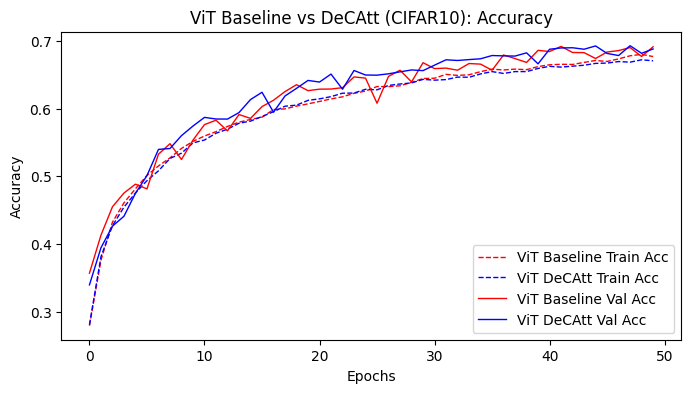

In [3]:
base_path = "stats"

files = ["vit_baseline_cifar10_trainacc.txt", "vit_decatt_cifar10_trainacc.txt",
        "vit_baseline_cifar10_valacc.txt", "vit_decatt_cifar10_valacc.txt"]

plot_accuracy("stats", files, "CIFAR10")

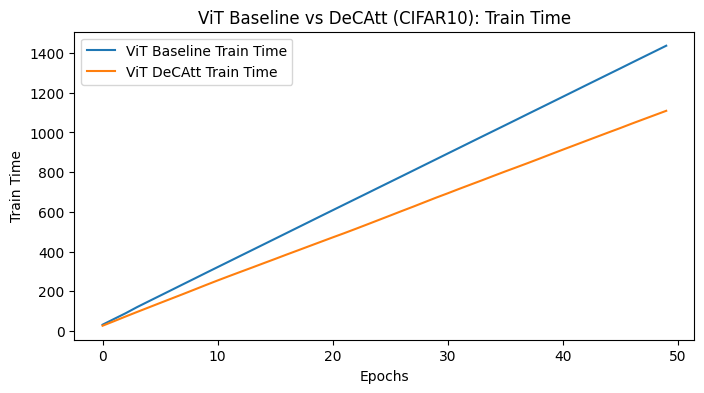

In [4]:
files = ["vit_baseline_cifar10_traintime.txt", "vit_decatt_cifar10_traintime.txt"]
plot("stats", files, "Train Time", "CIFAR10")

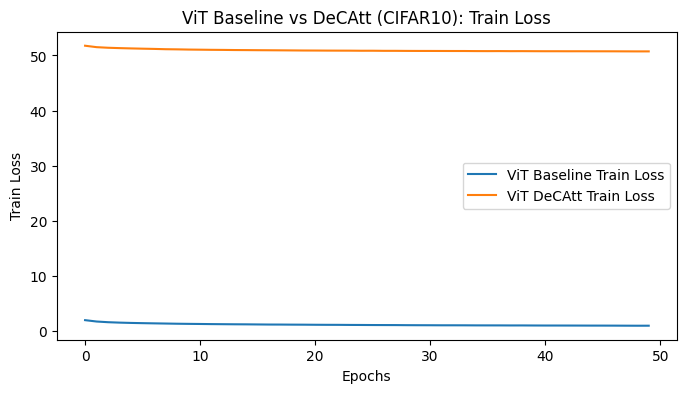

In [5]:
files = ["vit_baseline_cifar10_trainloss.txt", "vit_decatt_cifar10_trainloss.txt"]
plot("stats", files, "Train Loss", "CIFAR10")

### CIFAR100

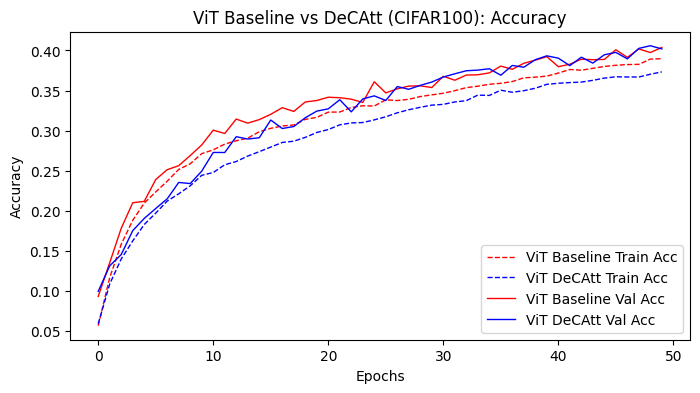

In [7]:
base_path = "stats"

files = ["vit_baseline_cifar100_trainacc.txt", "vit_decatt_cifar100_trainacc.txt",
        "vit_baseline_cifar100_valacc.txt", "vit_decatt_cifar100_valacc.txt"]

plot_accuracy("stats", files, "CIFAR100")

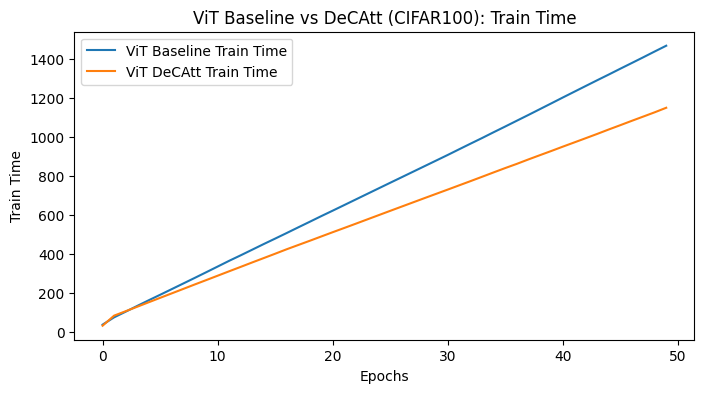

In [8]:
files = ["vit_baseline_cifar100_traintime.txt", "vit_decatt_cifar100_traintime.txt"]
plot("stats", files, "Train Time", "CIFAR100")

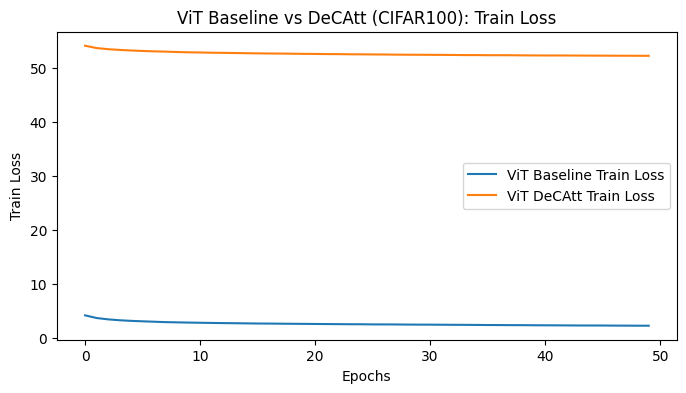

In [9]:
files = ["vit_baseline_cifar100_trainloss.txt", "vit_decatt_cifar100_trainloss.txt"]
plot("stats", files, "Train Loss", "CIFAR100")